### Model evaluation procedures
** Training and testing on the same dataset **
- The drawback with this is that this model will overfit for this specific dataset. Hence, if we try to 
apply the model into other datasets, there's a huge possibility that it will not provide accurate scores

** Train/test split **
- We perform two splits; one is the training (where we will build a model) and the other is the testing (where we will
make predictions on). 
- This is better than the previous options, but there's a lot of variance that can occur here. Because of 'low bias - high variance' dilemma
- The pro is that it's quick and flexible

** K-fold cross validation **
- Great estimator for cross validation as it performs across a bunch of different training/testing datasets
- The drawback is that it requires a lot of time and energy

### Model evaluation metrics
- ** Regression problems **: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- ** Classification problems **: Classification accuracy
---

# Classification accuracy (Pima Indian Dataset)

In [33]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['Pregant', 'Glucose', 'Blood Pressure', 'Skin Fold', 'Insulin', 'BMI', 'Diabities', 'Age', 'Label']
data_pima = pd.read_csv(url, header=None, names=col_names)

** Info on the column names: **
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

In [34]:
data_pima.head()

,Pregant,Glucose,Blood Pressure,Skin Fold,Insulin,BMI,Diabities,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Question: Can we predict the diabities status of a patient given their health measurments?

In [35]:
# We'll use the following as the feature columns
fts_clms = ['Pregant', 'Insulin', 'BMI', 'Age']
X_fts = data_pima[fts_clms]
y_trgt = data_pima.Label

In [36]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, random_state=0) 

In [37]:
# Training the data on a logistic regression (which is a classification model apparently?)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# Making prediction for the testing set with the model from the logistic regression
y_pred = logreg.predict(X_test)

In [39]:
# Calculating accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.692708333333


#### Null Accuracy: Check reference for most information on this

In [40]:
# Examine the class distribution of the testing set with a Pandas Series method
y_test.value_counts()

0    130
1     62
Name: Label, dtype: int64

In [41]:
# The percentage of ones (or diabetes patient) to the total observation
y_test.mean()

0.3229166666666667

In [71]:
# The percentage of zeros (or non-diabetes patient) to the total observation
1 - y_test.mean()


0.6770833333333333

**Notes**
- The number will be used as the null accuracy
- The 68% tells is that if we predict that the patient will not have cancer, we will be correct 68% of the time

In [43]:
# Calculating the null accuracy for a binary classification
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [44]:
# Calculating the null accuracy for a multi-classification
y_test.value_counts().head(1)/len(y_test)


0    0.677083
Name: Label, dtype: float64

**Note:**
- There's a weakness to this model. If we simply choose the one that has a higher frequency, non-cancer patient, this provides very similar results to the logistic regression model we build.


In [45]:
# Print the first 25 true and predicted responses
print('True: ', y_test.values[0:25])
print('Predicted: ', y_pred[0:25])


True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Predicted:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Note:**
- That when the true is 0 or non-diabetes, it usually makes the correct prediction
- However, when the patient has diabetes, that's where there are difficulities in the prediction


#### Confusion Matrix

In [46]:
# Important: Pass the actual results as the first parameter and then the prediction

In [47]:
print(metrics.confusion_matrix(y_test, y_pred))

[[118  12]
 [ 47  15]]


For the matrix above, this is format
- On the right side, it's the 'ACTUAL' and the axis on the top it's the 'PREDICTION'
- The first row or column is the label 0, and the second row or columns is the label 1
- It's a 2x2 matrix because there are 2 response classes
- The format shown here is not universal

** Basic terminology **
- True Positives (TP): we correctly predicted that they do have diabetes 
    - [**lower-right corner: 15**]
- True Negatives (TN): we correctly predicted that they don't have diabetes 
    - [**upper-left corner: 118**]
- False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 
    - [**upper-right corner: 12**]
- False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 
    - [**lower-left corner: 47**]



In [48]:
# Save confusion matrix and slice it into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [49]:
# Classification accuracy
print((TP+TN) / float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred))

0.692708333333
0.692708333333


In [50]:
# Classification error or the 'Misclassification Rate'
print((FP+FN) / float(TP+TN+FP+FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.307291666667
0.307291666667


In [51]:
# Sensitivity: The bottom row (TP and FN) is the the total of being 1 or in this case, patient with diabities
print(TP / float(TP+FN))
print(metrics.recall_score(y_test, y_pred))

# Based on the ACTUAL being 1 or patient with diabities
# Position [1,0] or second row, first col. -> This means that we predicted that the patient will NOT
# have diabities but the patient actually does. 
# Position [1,1] or second row, second col. -> This means that we predicted that the patient will 
# have diabities and the patient actually does. 

0.241935483871
0.241935483871


In [52]:
# Specificity: The top row (TN + FP) is the the total of being 0 or in this case, patient with non-diabities
print(TN / float(FP+TN))

# Based on the ACTUAL being 0 or patient with NO diabities
# Position [0,0] or first row, first col. -> This means that we predicted that the patient will NOT
# have diabities and the patient actually does NOT. 
# Position [0,1] or first row, second col. -> This means that we predicted that the patient will NOT
# have diabities but the patient actually does. 

0.907692307692


In [53]:
# False positive
print(FP / float(TN + FP))

0.0923076923077


In [54]:
# Precision
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.555555555556
0.555555555556


### Note:
- The choice of metric depends on the business objective
- **Spam filter** (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Adjusting the classfication threshold: PROBA

In [55]:
# The first 10 predicted response
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [56]:
# The first 10 predicted probabilities
logreg.predict_proba(X_test)[0:10, :]


array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

**Note:**
- Each row is an observation, or patient in this case
- The columns are divided by 0 and 1
- 0 being non-diabities and 1 diabities
- The code above is based on this probabilties where the higher probabilty is the one that gets predicted

In [57]:
# The first 10 predicted probabilities for class one and storing it in a variable
y_pred_prob_1 = logreg.predict_proba(X_test)[:, 1]

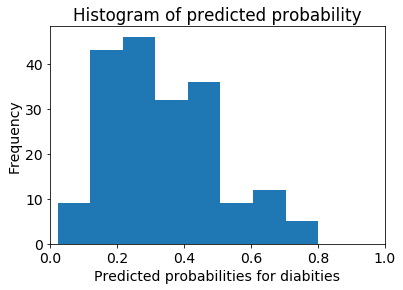

In [58]:
# Plotting the proability for class 1 in a histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =  14

plt.hist(y_pred_prob_1, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probability')
plt.xlabel('Predicted probabilities for diabities')
plt.ylabel('Frequency')

In [59]:
# Initially the threshold is 0.5, but we can adjust the threshold
from sklearn.preprocessing import binarize
y_pred_cls_1 = binarize([y_pred_prob_1], 0.3)[0]

In [60]:
# Printing the first 10 predicted values
y_pred_prob_1[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [61]:
# Printing the first 10 predicted classes
y_pred_cls_1[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [62]:
# The previous confustion matrix (with threshold of .5)
print(confusion)

[[118  12]
 [ 47  15]]


In [63]:
# Adjusting a new confusion matrix with the new threshold
confusion_new = metrics.confusion_matrix(y_test, y_pred_cls_1)
print(confusion_new)

[[80 50]
 [16 46]]


In [64]:
# Sensitivity: The actual percentage of patient with diabities over the times the model believed the patient had
# diabities
print(metrics.recall_score(y_test, y_pred_cls_1))
print(46 / float(16+46))


0.741935483871
0.7419354838709677


**Note:**
- This number increased from 0.741935483871 to 0.7419354838709677 


In [65]:
# Specificity: The actual percentage of patient with non-diabities over the times the model believed the patient 
# did not have diabities
print(80/ float(80+50))


0.6153846153846154


**Note:**
- This number decreased from 0.907692307692 to 0.6153846153846154


### ROC Curve and Area Under the Curve (AUC)
-

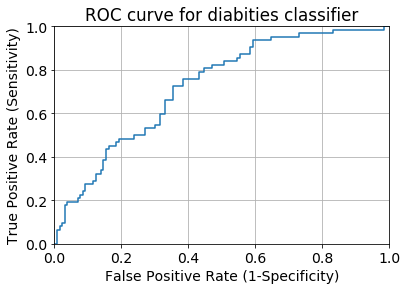

In [66]:
# Initializing the ROC
# fpr = false positive rate, tpr = true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabities classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [67]:
# Function returns the sensitivity and specificity of a given threshold
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [68]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [69]:
evaluate_threshold(0.75)

Sensitivity: 0.0
Specificity: 0.992307692308


### AUC Curve

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_fts, y_trgt, cv=10, scoring='roc_auc').mean()

0.73782336182336183